# 1. `Async with` 활용 코드

In [ ]:
import asyncio 
from dotenv import load_dotenv

from langchain_mcp_adapters.client import MultiServerMCPClient
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

# 환경변수 불러오기
load_dotenv()

#-------------------------------------------------------------------
# 1. LLM 모델 설정
#-------------------------------------------------------------------
model = ChatOpenAI(model="gpt-4o-mini")

#-------------------------------------------------------------------
# 2. 비동기 실행
#-------------------------------------------------------------------
async with MultiServerMCPClient( 
    {
        "calculator": {
            "url": "http://0.0.0.0:8005/sse",
            "transport": "sse"
        },
        "rag_server": {
            "command": "/Users/narae/wanted/mcp_exercise/.venv/bin/python",
            "args": ["/Users/narae/wanted/mcp_exercise/03_RAG_stdio/server.py"],
            "transport": "stdio"
        }
    }
) as client:
    agent = create_react_agent(model, client.get_tools())
    calculator_response = await agent.ainvoke({"messages": "3 * 5 + 4가 뭐야?"})
    rag_response = await agent.ainvoke({"messages": "딥씨크는 언제 나왔어?"})

In [3]:
calculator_response

{'messages': [HumanMessage(content='3 * 5 +4가 뭐야?', additional_kwargs={}, response_metadata={}, id='f6202677-2b05-4788-bce5-45ade8e9b5c5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_DCJKnqzH216bMERGHVUCGyKA', 'function': {'arguments': '{"a": 3, "b": 5}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'call_AWEj41s0ox1WQMircBrQyryH', 'function': {'arguments': '{"a": 15, "b": 4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 115, 'total_tokens': 166, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BUTmQlzN0mTN65XwHy2eB5hnwzvM9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-eefa4c13-8071-4da1-abf1-533136daf412-

In [4]:
rag_response

{'messages': [HumanMessage(content='딥씨크는 언제 나왔어?', additional_kwargs={}, response_metadata={}, id='d411b9e8-f307-4d2c-a297-1a32df3e5822'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4lZ54idGJPe1NJBb3QtYWQNF', 'function': {'arguments': '{"question":"딥씨크는 언제 나왔어?"}', 'name': 'rag_qa'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 115, 'total_tokens': 141, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BUTmT2xdlt7Vzw14Md8ztLrW9fPYy', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8f0282b7-7ad0-4c37-be64-0211d72ef4ac-0', tool_calls=[{'name': 'rag_qa', 'args': {'question': '딥씨크는 언제 나왔어?'}, 'id': 'call_4lZ54idGJPe1NJBb3QtYWQNF', 'typ

# 2. `Async with` 없는 코드

`async with`를 사용하게 되면 코드가 끝난 이후 session이 닫혔기 때문에 도구에 다시 접근할 수 없다.

In [5]:
import asyncio 
from dotenv import load_dotenv

from langchain_mcp_adapters.client import MultiServerMCPClient
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

# 환경변수 불러오기
load_dotenv()

#-------------------------------------------------------------------
# 1. LLM 모델 설정
#-------------------------------------------------------------------
model = ChatOpenAI(model="gpt-4o-mini")

#-------------------------------------------------------------------
# 2. 클라이언트 생성
#-------------------------------------------------------------------
client = MultiServerMCPClient( 
    {
        "calculator": {
            "url": "http://0.0.0.0:8005/sse",
            "transport": "sse"
        },
        "rag_server": {
            "command": "/Users/narae/wanted/mcp_exercise/.venv/bin/python",
            "args": ["/Users/narae/wanted/mcp_exercise/03_RAG_stdio/server.py"],
            "transport": "stdio"
        }
    }
)
client

In [7]:
# 클라이언트 도구 출력
print(client.get_tools())  

[]


In [8]:
#-------------------------------------------------------------------
# 3. 클라이언트 연결 초기화
#-------------------------------------------------------------------
await client.__aenter__()

In [9]:
# 클라이언트 도구 출력
print(client.get_tools())  

[StructuredTool(name='add', description='덧셈하는 함수', args_schema={'properties': {'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}, 'required': ['a', 'b'], 'title': 'addArguments', 'type': 'object'}, response_format='content_and_artifact', coroutine=<function convert_mcp_tool_to_langchain_tool.<locals>.call_tool at 0x115692700>), StructuredTool(name='multiply', description='곱셈하는 함수', args_schema={'properties': {'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}, 'required': ['a', 'b'], 'title': 'multiplyArguments', 'type': 'object'}, response_format='content_and_artifact', coroutine=<function convert_mcp_tool_to_langchain_tool.<locals>.call_tool at 0x115692480>), StructuredTool(name='rag_qa', description='벡터 검색 기반 RAG QA. 질문을 입력하면 관련 문서를 검색합니다.', args_schema={'properties': {'question': {'title': 'Question', 'type': 'string'}}, 'required': ['question'], 'title': 'rag_qaArguments', 'type': 'object'}, response_format='content_and_ar

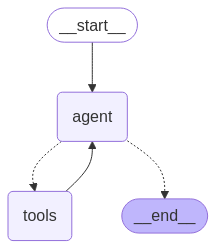

In [10]:
#-------------------------------------------------------------------
# 4. Agent 생성
#-------------------------------------------------------------------
agent = create_react_agent(model, client.get_tools())
agent

In [ ]:
#-------------------------------------------------------------------
# 5. 사용자 질문에 따른 응답 생성
#-------------------------------------------------------------------
calculator_response = await agent.ainvoke({"messages": "3 * 5 + 4가 뭐야?"})
rag_response = await agent.ainvoke({"messages": "딥씨크는 언제 나왔어?"})

In [12]:
calculator_response

{'messages': [HumanMessage(content='3 * 5 + 4가 뭐야?', additional_kwargs={}, response_metadata={}, id='ec5ed89a-c0de-4a84-b194-22a8fa116ab3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1ItWYiUabLzBFKd1QiUmDzIq', 'function': {'arguments': '{"a": 3, "b": 5}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'call_z2i9fr2XneWVoZ4nQpdT11zX', 'function': {'arguments': '{"a": 15, "b": 4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 116, 'total_tokens': 167, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BUkay1v8n7dsrIGDDsGGNbvwz0RfL', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-273e2bb5-1abd-448a-a20a-d76713d788f9

In [13]:
rag_response

{'messages': [HumanMessage(content='딥씨크는 언제 나왔어?', additional_kwargs={}, response_metadata={}, id='4b963276-64bd-4e15-a113-10385ec24ee3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0s1ZE8XJDR1eLYtbNyNycr9B', 'function': {'arguments': '{"question":"딥씨크는 언제 나왔어?"}', 'name': 'rag_qa'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 115, 'total_tokens': 141, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BUkb1wydR9HvfI04EBNIm2fhGY6yF', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f511a0cc-ca90-44d2-8f21-719fb5db4692-0', tool_calls=[{'name': 'rag_qa', 'args': {'question': '딥씨크는 언제 나왔어?'}, 'id': 'call_0s1ZE8XJDR1eLYtbNyNycr9B', 'typ

In [15]:
total_response = await agent.ainvoke({"messages": "딥씨크가 뭐야? 아 그전에 먼저 5 * 6 + 3의 값도 계산해줘. 모든 답변은 도구를 이용해줘"})
total_response

{'messages': [HumanMessage(content='딥씨크가 뭐야? 아 그전에 먼저 5 * 6 + 3의 값도 계산해줘. 모든 답변은 도구를 이용해줘', additional_kwargs={}, response_metadata={}, id='54668edc-5ada-4b70-8358-2b6c38837226'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_RTVUVpe9ykZi6E6gdt6CCsQU', 'function': {'arguments': '{"a":5,"b":6}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 142, 'total_tokens': 160, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BUkd1rtKVxMfO0SjQnZwj92G5zWrS', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3582716b-0861-4fc0-aa5e-a26503494606-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 6}, 'id': 'call_RTVUVpe9ykZi

## 3. System Prompt 입력하기

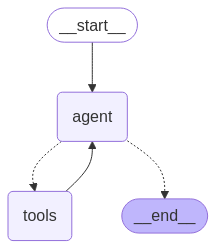

In [17]:
system_prompt = """\
당신은 친구처럼 편한 비서입니다. 모든 답변은 반말로 진행하세요.
답변은 모두 도구를 사용해야 합니다.
"""

#-------------------------------------------------------------------
# 4. Agent 생성
#-------------------------------------------------------------------
agent = create_react_agent(
    model, 
    tools=client.get_tools(),
    prompt=system_prompt
)
agent

In [18]:
total_response = await agent.ainvoke({"messages": "딥씨크가 뭐야? 아 그전에 먼저 5 * 6 + 3의 값도 계산해줘"})
total_response

{'messages': [HumanMessage(content='딥씨크가 뭐야? 아 그전에 먼저 5 * 6 + 3의 값도 계산해줘', additional_kwargs={}, response_metadata={}, id='9908612e-046f-451b-afd4-c5ad70cee84a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_CMwT2V3TMumwl8fjpWb8r2Ft', 'function': {'arguments': '{"a": 5, "b": 6}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'call_LQdPjvQhMmHp1cI4H9osz000', 'function': {'arguments': '{"a:": 30, "b": 3}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 163, 'total_tokens': 215, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BUlDpTRU9Js5MB6FWs2CrQ9qmzCYb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-79f28685-ebf1